In [1]:
import tensorflow as tf
import numpy as np

In [2]:
from matplotlib import pyplot as plt

In [5]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [7]:
x, y = mnist.train.next_batch(100)

In [9]:
x = np.reshape(x, [-1, 28, 28, 1])

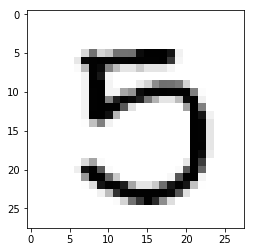

In [12]:
plt.imshow(x[0, :, :, 0], cmap='Greys')
plt.show()

In [13]:
y[0]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [14]:
x_test, y_test = mnist.test.next_batch(100)

In [15]:
x_test = np.reshape(x_test, [-1, 28, 28, 1])

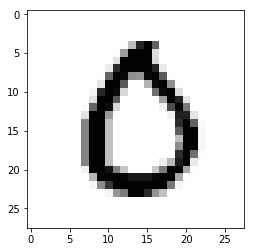

In [16]:
plt.imshow(x_test[0, :, :, 0], cmap='Greys')
plt.show()

In [17]:
y_test[0]

array([ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

In [18]:
x = mnist.train.images

In [19]:
x.shape

(55000, 784)

In [35]:
x_test = mnist.test.images
y_test = mnist.test.labels

In [21]:
x_test.shape

(10000, 784)

In [23]:
# Create the model
x = tf.placeholder(tf.float32, [None, 784])
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))
y = tf.matmul(x, W) + b

# Define loss and optimizer
y_ = tf.placeholder(tf.float32, [None, 10])

# The raw formulation of cross-entropy,
#
#   tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(tf.nn.softmax(y)),
#                                 reduction_indices=[1]))
#
# can be numerically unstable.
#
# So here we use tf.nn.softmax_cross_entropy_with_logits on the raw
# outputs of 'y', and then average across the batch.
cross_entropy = tf.reduce_mean(
  tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [25]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()

In [36]:
sess.run(train_step, feed_dict={x: x_test, y_: y_test})